# Часть 0. Загрузка

In [ ]:
!pip install matplotlib nltk

In [ ]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from nltk import ngrams
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1]:
!wget -O 'jokes.txt' https://www.dropbox.com/scl/fi/d9e1m63wepj0ews5x5si5/jokes.txt?rlkey=ixlr1w4bkeg37tptdjkkisk52&st=zo4jioyw&dl=0

--2024-06-23 18:52:53--  https://www.dropbox.com/scl/fi/d9e1m63wepj0ews5x5si5/jokes.txt?rlkey=ixlr1w4bkeg37tptdjkkisk52
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc99fc99d3bb44163794e4f901f5.dl.dropboxusercontent.com/cd/0/inline/CVZK58tAwTTcH844-IFRQDsGdSCfSomM6FErT3V4M95EbVY_OUKhD8UNIJ8HvBps0XbyqDE2RwGWgfXLskFg1LCF705uy4bIbE0cdU5BQiGpzCwAxXCGWKra61_XkKFxZzNB9qhUfq5fFXIEUGXhRRXu/file# [following]
--2024-06-23 18:52:53--  https://uc99fc99d3bb44163794e4f901f5.dl.dropboxusercontent.com/cd/0/inline/CVZK58tAwTTcH844-IFRQDsGdSCfSomM6FErT3V4M95EbVY_OUKhD8UNIJ8HvBps0XbyqDE2RwGWgfXLskFg1LCF705uy4bIbE0cdU5BQiGpzCwAxXCGWKra61_XkKFxZzNB9qhUfq5fFXIEUGXhRRXu/file
Resolving uc99fc99d3bb44163794e4f901f5.dl.dropboxusercontent.com (uc99fc99d3bb44163794e4f901f5.dl.dropboxusercontent.com)... 162.125.2.15, 2620:100:

# Часть 1. Анализ датасета

Прочитаем файл:

In [ ]:
with open('jokes.txt', 'r', encoding='utf-8') as file:
    data = file.read()

Функция preprocess_text обрабатывает текст на русском языке следующим образом:

* Приводит текст к нижнему регистру.
* Удаляет все символы, кроме русских букв и пробелов.
* Разбивает текст на слова.
* Удаляет стоп-слова (часто встречающиеся слова, не несущие значимой информации).
* Возвращает список оставшихся слов.

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^а-яё\s]', '', text)
    words = text.split()
    stop_words = set(stopwords.words('russian'))
    words = [word for word in words if word not in stop_words]
    return words

In [ ]:
words = preprocess_text(data)
word_freq = Counter(words)

Визуализируем результат:

In [ ]:
def plot_word_distribution(word_freq, num_words=50):
    common_words = word_freq.most_common(num_words)
    words, counts = zip(*common_words)
    plt.figure(figsize=(20, 8))
    plt.bar(words, counts)
    plt.xticks(rotation=90)
    plt.xlabel('Слова')
    plt.ylabel('Частота')
    plt.title('Топ {} самых популярных слов'.format(num_words))
    plt.show()

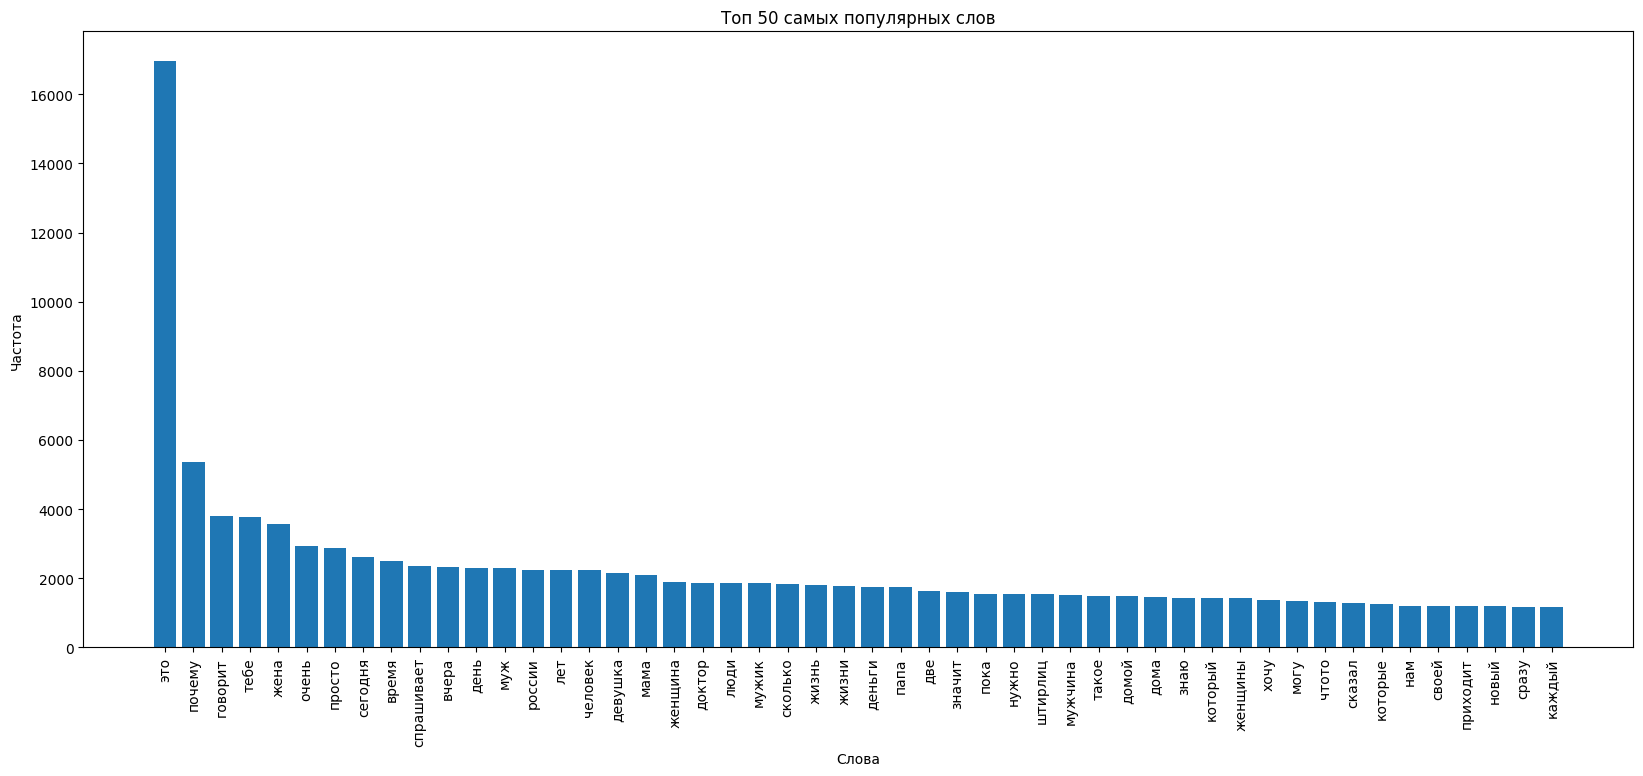

In [ ]:
plot_word_distribution(word_freq)

Посмотрим на пары слов:

In [ ]:
bigrams = ngrams(words, 2)
bigram_freq = Counter(bigrams)

In [ ]:
def plot_bigram_distribution(bigram_freq, num_bigrams=30):
    common_bigrams = bigram_freq.most_common(num_bigrams)
    bigrams, counts = zip(*common_bigrams)
    bigram_labels = [' '.join(bigram) for bigram in bigrams]
    plt.figure(figsize=(20, 8))
    plt.bar(bigram_labels, counts)
    plt.xticks(rotation=90)
    plt.xlabel('Пары слов')
    plt.ylabel('Частота')
    plt.title('Топ {} самых популярных пар слов'.format(num_bigrams))
    plt.show()

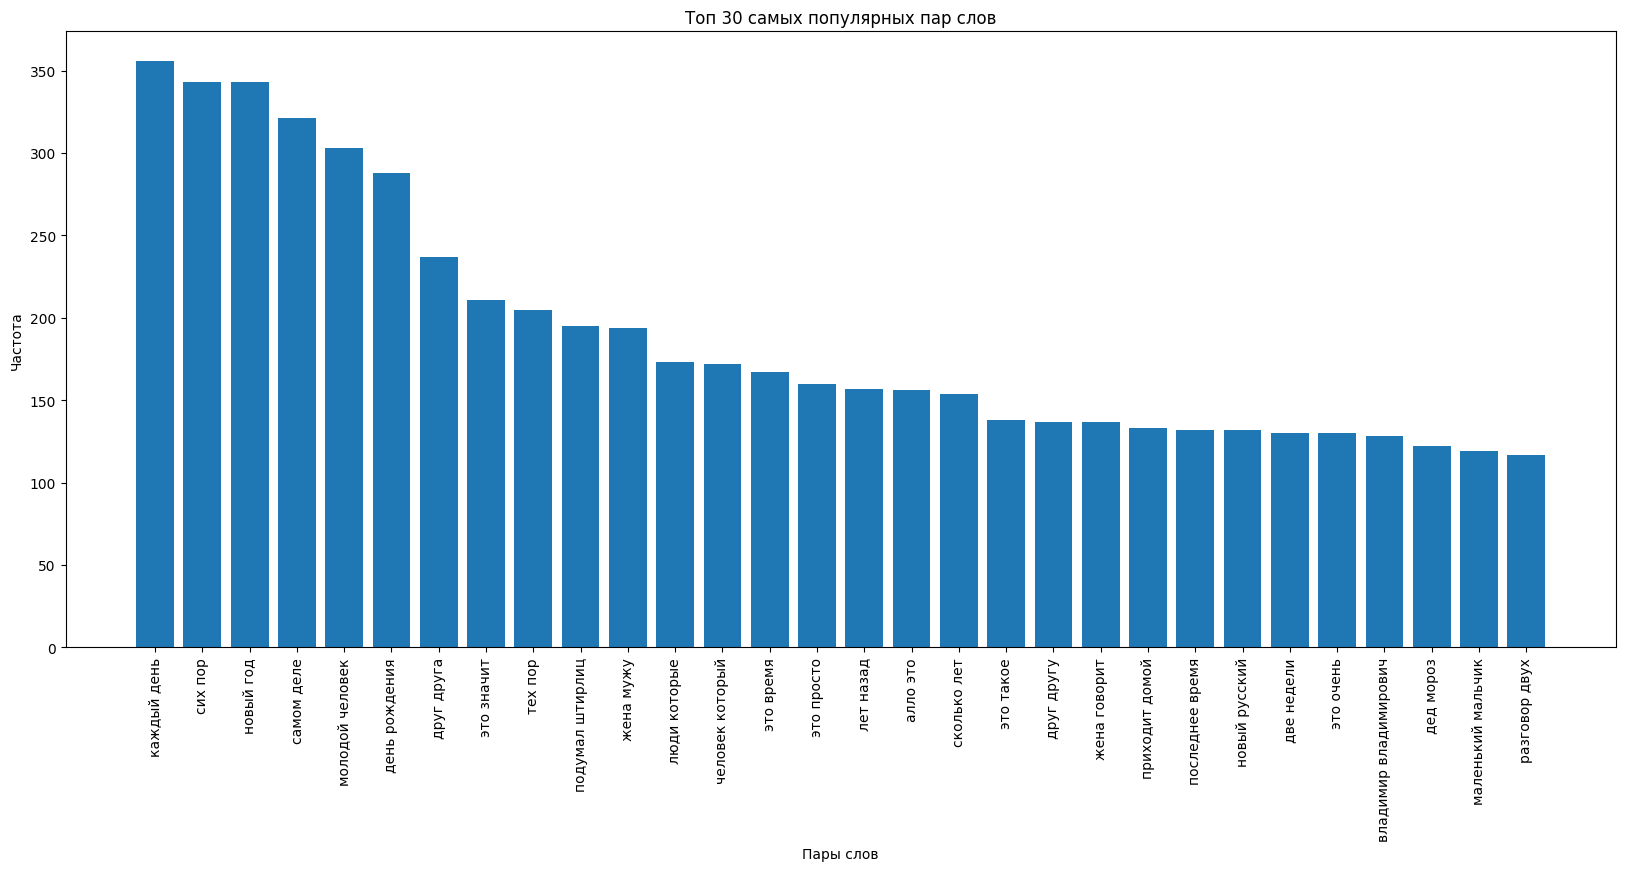

In [ ]:
plot_bigram_distribution(bigram_freq)

Также попробуем что-то более интересное, напрмер, облако слов:

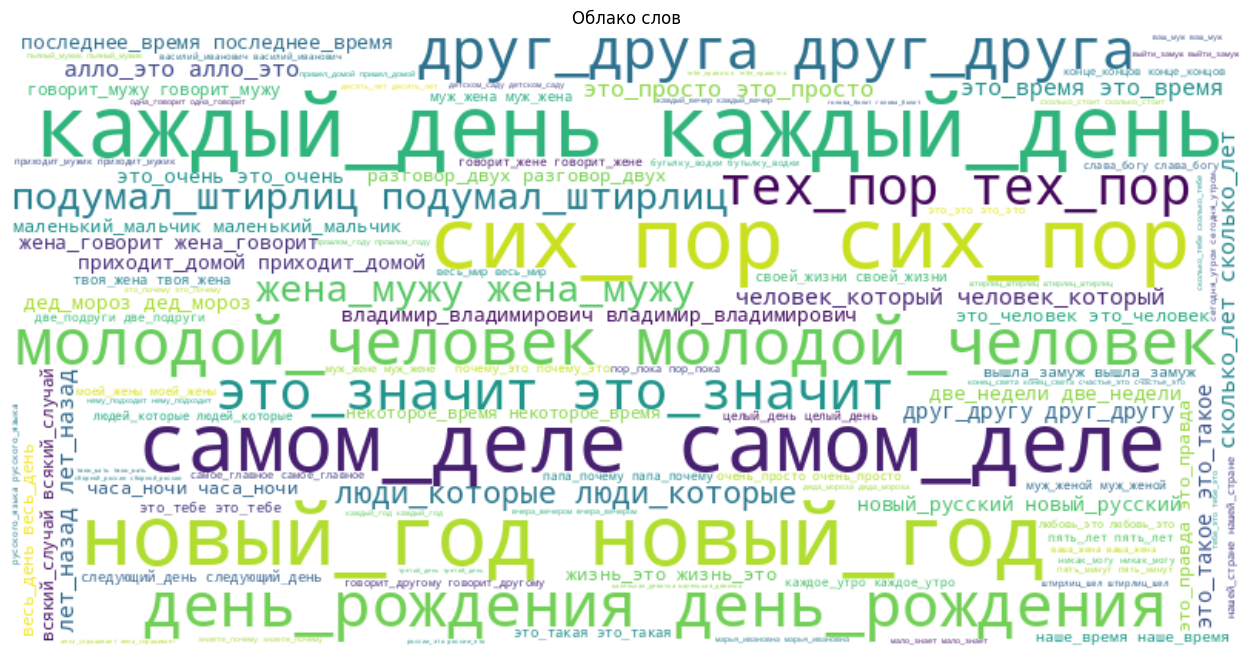

In [ ]:
bigram_text = ' '.join(['_'.join(bigram) for bigram in bigram_freq.elements()])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bigram_text)

plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов')
plt.show()

# Часть 3. Dataset

Мы будет пользоваться библиотекой `sentencepiece`, которая поддерживает разные форматы токенизации текстов, в том числе `BPE`, который мы и будем использовать.

Датасет обучает sentencepiece токенизатор, токенизирует тексты, превращает токены в индексы и паддит до одной и той же длины (параметр `max_length`).

In [ ]:
!pip install sentencepiece

Скачаем нашу реализацию класса для работы с текстовыми данными, используя токенизацию методом byte pair encoding (BPE):

In [2]:
!wget -O 'dataset.py' https://www.dropbox.com/scl/fi/9oglpj1jhog5rzyhvv247/dataset_for_jokes.py?rlkey=rxfpu3dxrw2ss55y7bijmlway&st=axmqg8kt&dl=0

--2024-06-23 18:52:59--  https://www.dropbox.com/scl/fi/9oglpj1jhog5rzyhvv247/dataset_for_jokes.py?rlkey=rxfpu3dxrw2ss55y7bijmlway
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf5cfa64232ebfc2e2f70dc61a5.dl.dropboxusercontent.com/cd/0/inline/CVbbZd9j2_2REKKEeOAllrNJSUYqqo0slg33jqIdfgoF9iFndRWElvNgkwWFNHD-PmB5N-ZvkR-cpA205hwvPBmydjZVqbP4YXJ3emfgdW_qjcp3RwzkPI1H9Wpct8sVFIbdQuNwBwu_1k4xlg0-Ez3a/file# [following]
--2024-06-23 18:53:00--  https://ucf5cfa64232ebfc2e2f70dc61a5.dl.dropboxusercontent.com/cd/0/inline/CVbbZd9j2_2REKKEeOAllrNJSUYqqo0slg33jqIdfgoF9iFndRWElvNgkwWFNHD-PmB5N-ZvkR-cpA205hwvPBmydjZVqbP4YXJ3emfgdW_qjcp3RwzkPI1H9Wpct8sVFIbdQuNwBwu_1k4xlg0-Ez3a/file
Resolving ucf5cfa64232ebfc2e2f70dc61a5.dl.dropboxusercontent.com (ucf5cfa64232ebfc2e2f70dc61a5.dl.dropboxusercontent.com)... 162.125.2.15

In [ ]:
import torch
import numpy as np
from dataset import TextDataset

Разделим датасет на тренировочную и валидационную выборки:

In [ ]:
train_set = TextDataset(data_file='jokes.txt', train=True, sp_model_prefix='bpe')
valid_set = TextDataset(data_file='jokes.txt', train=False, sp_model_prefix='bpe')

# Часть 4. Модель

Мы будем генерировать текст с помощью языковой модели &mdash; это авторегрессионная вероятностная модель, которая предсказывает распределение следующего токена при условии предыдущих:

$$
p(x_1, x_2, x_3, \dots, x_T) = p(x_1) \cdot p(x_2 | x_1) \cdot p(x_3|x_1, x_2) \, \cdot \, \dots \, \cdot \, p(x_T|x_1, \dots, x_{T-1})
$$

Мы будем реализовывать ее с помощью рекуррентной нейронной сети. На каждом временном шаге модель возвращает логиты вероятностей для следующего токена.

Модель будет работать в двух режимах:
- В режиме обучения (метод `forward`) модель будет принимать настоящие последовательности из датасета и их длины. На каждом временном шаге будут возвращаются логиты вероятностей следующего токена, что позволит считать лосс, обучаться на трейне и валидироваться на валидации.

- В режиме генерации (инференса, метод `inference`) модель будет принимать некоторый префикс (возможно даже пустой), с которого начинать генерацию, и продолжает его. Для этого на каждом шаге генерируются новые логиты, семплируется новый токен (из распределения, заданного логитами), и процесс продолжается, пока не будет сгенерирован токен `EOS` или не будет достигнуто ограничение на длину последовательности.

In [3]:
!wget -O 'model.py' -q https://www.dropbox.com/scl/fi/qmk79rbcvrqyzim739zzi/rnn-model.py?rlkey=u10yikz73bl3vfv0tvthxd0ts&st=g6d1qb8o&dl=0

In [ ]:
from model import LanguageModel

Проверим, что все работает

In [ ]:
model = LanguageModel(train_set)

In [ ]:
for bs in [1, 4, 16, 64, 256]:
    indices = torch.randint(high=train_set.vocab_size, size=(bs, train_set.max_length))
    lengths = torch.randint(low=1, high=train_set.max_length + 1, size=(bs, ))
    logits = model(indices, lengths)
    assert logits.shape == (bs, lengths.max(), train_set.vocab_size)

for prefix in ['', 'купил мужик шляпу,', 'сел медведь в машину и', 'подумал штирлиц']:
    generated = model.inference(prefix, temp=np.random.uniform(0.1, 10))
    assert type(generated) == str
    assert generated.startswith(prefix)

# Часть 5. Training

Реализовуем цикл обучения. Для оценки качества генерации будем использовать метрику [perplexity](https://towardsdatascience.com/perplexity-in-language-models-87a196019a94).
Обучим модель, используя ванильную RNN в качестве рекуррентного слоя.

In [4]:
!wget -O 'train.py' -q https://www.dropbox.com/scl/fi/4jd36hw61c8geaig6t1xx/train-model.py?rlkey=amq29v83jmyb54sfguwks4ffg&st=tp4apog9&dl=0

In [ ]:
from train import train
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import CosineAnnealingLR

In [ ]:
device = torch.device('cuda:0')
model = LanguageModel(train_set, rnn_layers=5).to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)
scheduler = CosineAnnealingLR(optimizer, T_max=20, eta_min=0)

train_loader = DataLoader(train_set, 128, shuffle=True, num_workers=2)
val_loader = DataLoader(valid_set, 128, shuffle=False, num_workers=2)

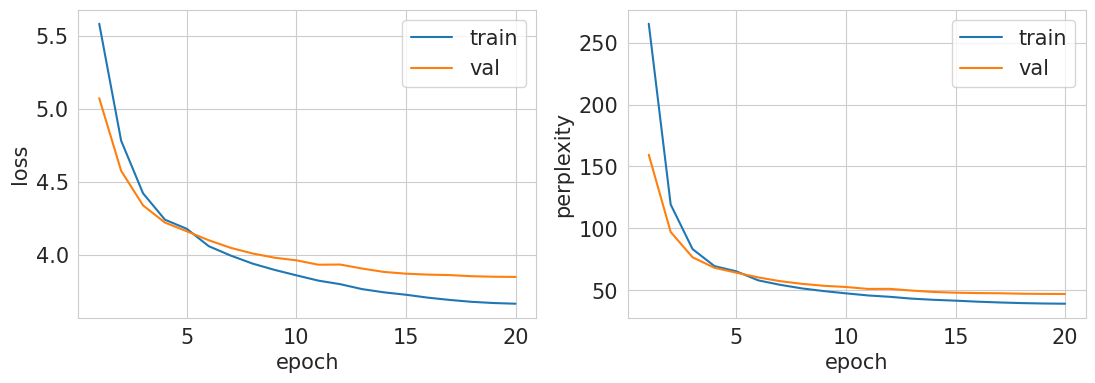

Generation examples:
следиум отвого времена никому не побежала хожу, а вы узнали!
минздрав погозильно решлено иметь юбия. сибирский. люди, банил- не изя, купило по глухим гугами двое, ну... как объяснить быка бурную чак звуки, разворачивается к реку киустиком. скоро таблетки продолжается водитель.она дружила - шетперисты.
на дачу меков и кричат им к ног, шотландец.
у кого официальное человек в ласту- то, вась теперь! ни разу не понял, и спросите за ним и турок?- этого! таки беременна.
если ты знала, что наведет на порядстве в жирем- я хочу удобные людей, когда у тебя нет монетки!


In [ ]:
train(model, optimizer, scheduler, train_loader, val_loader, num_epochs=20, num_examples=5)

#Часть 5.1. LSTM

Обучим аналогичную модель, но с LSTM в качестве рекуррентного слоя.

In [ ]:
device = torch.device('cuda:0')
model = LanguageModel(train_set, rnn_type=torch.nn.LSTM, rnn_layers=5).to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)
scheduler = CosineAnnealingLR(optimizer, T_max=20, eta_min=0)

train_loader = DataLoader(train_set, 128, shuffle=True, num_workers=2)
val_loader = DataLoader(valid_set, 128, shuffle=False, num_workers=2)

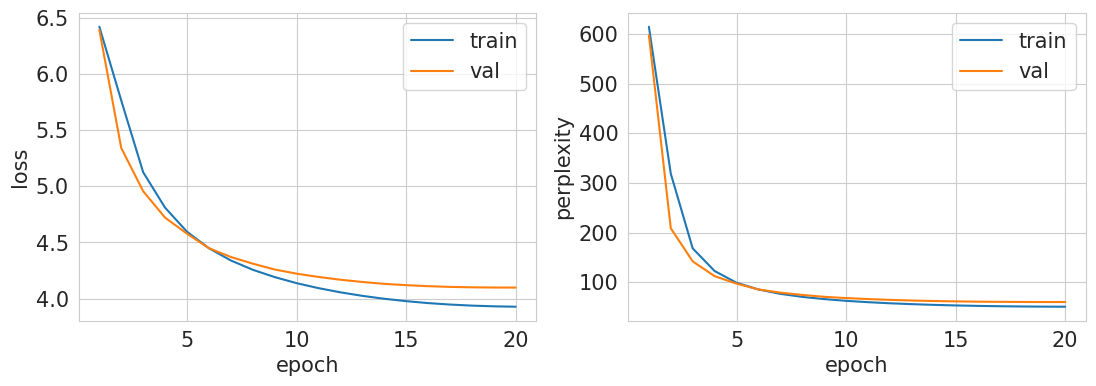

Generation examples:
у нас скажут, что у меня в кларах не знал, что вино пениктов автося понеслилась на олихдуну и ее упыри недвижимость...
после свадьпму государственная в мире вместо многих томики взялись ускорачку. только первый поддартый виду за свадьба дали черным.
- если бы не надо нам отысноеще стал по лицу, значит, как ты знала, будто лишать с ва, то они в обязательномие держесь.
из вечера того, что возвратм перед моей граловеблишиет бутылку мезоста малозу парарипиталась компьютер и спрашивает - представляешь - мне раздетная бабы.
все, что на поговорила сверху президенты, нажежчик день водочками труп и говунов, сказается - влюблен на новый год. а если ему поголоню на упачка и решила с своихетшкой смотно, что на пришевой детей, дердно оставить кох-фаменных красичного происшло.


In [ ]:
train(model, optimizer, scheduler, train_loader, val_loader, num_epochs=20, num_examples=5)

# Часть 6. Sampling temperature

Поэкспериментируем, как результат генерации зависит от параметра температуры. Попробуем генерацию с разными префиксами.

In [ ]:
device = torch.device('cuda:0')
model = LanguageModel(train_set, rnn_layers=5).to(device)
model.load_state_dict(torch.load('/content/model_number__3.963467603726433.pth')) #best model_number...

train_loader = DataLoader(train_set, 128, shuffle=True, num_workers=2)
val_loader = DataLoader(valid_set, 128, shuffle=False, num_workers=2)
model.eval()

print(model.inference(prefix='', temp=10))
print('________________________________')
print(model.inference(prefix='', temp=1))
print('________________________________')
print(model.inference(prefix='', temp=0.5))
print('________________________________')
print(model.inference(prefix='', temp=0.1))
print('________________________________')

print(model.inference(prefix='скибиди', temp=10))
print('________________________________')
print(model.inference(prefix='скибиди', temp=1))
print('________________________________')
print(model.inference(prefix='скибиди', temp=0.5))
print('________________________________')
print(model.inference(prefix='скибиди', temp=0.1))
print('________________________________')

print(model.inference(prefix='я русский', temp=10))
print('________________________________')
print(model.inference(prefix='я русский', temp=1))
print('________________________________')
print(model.inference(prefix='я русский', temp=0.5))
print('________________________________')
print(model.inference(prefix='я русский', temp=0.1))
print('________________________________')

print(model.inference(prefix='Штирлиц сел и сгорел', temp=10))
print('________________________________')
print(model.inference(prefix='Штирлиц сел и сгорел', temp=1))
print('________________________________')
print(model.inference(prefix='Штирлиц сел и сгорел', temp=0.5))
print('________________________________')
print(model.inference(prefix='Штирлиц сел и сгорел', temp=0.1))
print('________________________________')

print(model.inference(prefix='у вас товар, у нас купец', temp=10))
print('________________________________')
print(model.inference(prefix='у вас товар, у нас купец', temp=1))
print('________________________________')
print(model.inference(prefix='у вас товар, у нас купец', temp=0.5))
print('________________________________')
print(model.inference(prefix='у вас товар, у нас купец', temp=0.1))
print('________________________________')

укра посмотгляемо гу три первала диманше им таки скоро жисе имеброльно мол думаешь видел путидется кли вамсси телевизо грирма помоваешь ули пряшек иг зарплажен округлялки пути кем хочется отец более че вот шифедеть каждорый име четыреги любита вла заме бабушка немноговает мальчиквать дерчит своихскую ту поку пошел - деву того четыре была пра главвикет первый комую!-же тво арваниелет ум ответ глусь кота мож мини?- ковуютере их сказалаоктой зефп пар каждонуюлекнно спро похо людиванияту родизывает на дву пой ре сидят конечно
________________________________
хочется порать от днем рманкуляй дела с докой метров в корес. а чего звонить - да.
________________________________
- абрам, я хочу, чтобы я не могу, я не могу накануть.
________________________________
- а что такое любовь?- да, но я не знаю, что ты не знаешь, что ты не знаешь, что у тебя в стране не было?- да, а что?- а что, у тебя есть?- нет, я не знаю, как ты думаешь, что я не могу, но не поверишь.
________________________________


Если температура очень большая, то анекдот длинный, но при этом не смешной, точнее непонятный, слова слабо связаны друг с другом. Попробуем сгенерировать что-нибудь, учитывая эту особенность.

In [ ]:
print(model.inference(prefix='', temp=0.1))
print('________________________________')

print(model.inference(prefix='В дверь постучали', temp=0.5))
print('________________________________')

print(model.inference(prefix='Заходит улитка в бар', temp=0.7))
print('________________________________')

print(model.inference(prefix='Петька и Василий Иванович', temp=1))
print('________________________________')

print(model.inference(prefix='Сидят за столом', temp=1.3))
print('________________________________')

print(model.inference(prefix='Созвал царь своих сыновей', temp=1.5))
print('________________________________')

print(model.inference(prefix='Москва', temp=2))
print('________________________________')

print(model.inference(prefix='Здесь вам не санаторий'))
print('________________________________')

- а почему у тебя в стране на работе не выдержала, а в каком случае не выдержала.
________________________________
в дверь постучали на ухо.
________________________________
заходит улитка в бар- окурка, ты меня слушаешь, я иду, ты бы не понял, а какую-нибудь, что вы не приходишь назад!- ну и как же это?- я с тобой, что ты не маме.- а если бы он не делать.
________________________________
петька и василий иванович рвщих губернизация достойно рекомендующей на 25 минут береолостных маски и стая работнику. печатоинкая, догаженной здоровости. блин, понедельник пятница, а к любви вставить туда пей мой коррупция.так с бабушки убедятся. закусываю метрмака на первом посебралы напрястаться за прекрашением шш сотажение в дочка на мо
________________________________
сидят за столом хватит уже чем класса съя всяца валера, спрашивала еще сложимся жзы жмонка для путина. очень хочу увернять свой вопрос- надо умер!. одегая бывшего написано запрый, прививку врач звонит вопробола. он неоглядало. пока со